# Aviation Accidents Analysis

!["Image of plane with the text the future of travel"](images/plane-the-future-of-travel.jpg)

## **Business Understanding**
### **Background**
As part of our strategic initiative to diversify our company's portfolio, we are venturing into the aviation industry. This expansion involves purchasing and operating airplanes for both commercial and private enterprises. Given the high stakes associated with aviation, understanding the potential risks and ensuring the highest standards of safety is paramount for the success and sustainability of this new business endeavor.

### **Objective**
My primary objective is to identify the aircraft models that present the lowest risk in terms of safety and operational reliability. This involves a comprehensive analysis of historical aviation accident data to evaluate the safety performance of various aircraft manufacturers and models. The goal is to provide actionable insights that will guide the decision-making process for the acquisition of aircraft, ensuring that we select models with proven safety records.

## **Data Understanding**
To achieve this objective, I have utilized the National Transportation Safety Board (NTSB) [dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses), which includes detailed information on civil aviation accidents from 1962 to 2023. The analysis focuses on key metrics such as fatality rates, injury rates, and the number of uninjured passengers and crew in accidents. These metrics are crucial for assessing the overall safety performance of different aircraft models.

The decision on which aircraft to purchase will be based on the following criteria derived from our analysis:
1. Uninjured Rate - The proportion of passengers and crew who remain uninjured in the event of an accident.
2. Fatality Rate - The number of fatalities per accident involving the aircraft.
3. Variety and Availability: The range of models available from the manufacturer and their suitability for our intended operations i.e. commercial and private travel.


In [1]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Load the data
Load the data with the latin 1 encoding. 
When attempting to load the dataset, I faced a UnicodeDecodeError. This error typically occurs when the dataset contains characters that are not compatible with the utf-8, the default encoding used by the pd.read_csv() function.
The latin1 encoding is a common alternative to try because it can bypass many encoding-related issues without needing to know the exact encoding of the file.

In [2]:
# Loads the data
aviation_accidents_df = pd.read_csv('data/AviationData.csv', encoding='latin-1', low_memory=False)
aviation_accidents_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Inspect the data
Inspect the data to get an overview of the dataset and check for missing values.

In [3]:
# Gets an overview of the dataset
aviation_accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [4]:
# Finds number of missing values
aviation_accidents_df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [5]:
# Calculates statistics for each column
aviation_accidents_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## Data Cleaning
1. Check for duplicate values
2. Remove unnecessary columns and missing values
3. Convert columns to appropriate data types
4. Create 3 new columns that will be essential for data analysis: Total Passengers, Fatal Injury Rate and Total Uninjured Rate

In [6]:
# Makes a copy of the dataset 
aviation_accidents_df_copy = aviation_accidents_df.copy()

In [7]:
# checks for duplicate values
aviation_accidents_df_copy.duplicated().sum()

0

In [8]:
# Cleans column names by replacing dots with underscores
# and capitalizes the first letter of each word in column names
aviation_accidents_df_copy.columns = aviation_accidents_df_copy.columns.str.replace('.', '_').str.title()
aviation_accidents_df_copy.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_Damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_Of_Engines', 'Engine_Type', 'Far_Description',
       'Schedule', 'Purpose_Of_Flight', 'Air_Carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_Phase_Of_Flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

In [9]:
# checks the data types of each value in the 'Model' column
aviation_accidents_df_copy['Model'].apply(type)

0        <class 'str'>
1        <class 'str'>
2        <class 'str'>
3        <class 'str'>
4        <class 'str'>
             ...      
88884    <class 'str'>
88885    <class 'str'>
88886    <class 'str'>
88887    <class 'str'>
88888    <class 'str'>
Name: Model, Length: 88889, dtype: object

In [10]:
# checks the count of each data type in the 'Model' column
aviation_accidents_df_copy['Model'].apply(type).value_counts()

Model
<class 'str'>      88797
<class 'float'>       92
Name: count, dtype: int64

In [11]:
# Converts 'Model' column values to strings and replaces spaces with hyphens
aviation_accidents_df_copy['Model'] = aviation_accidents_df_copy['Model'].astype(str).str.replace(' ', '-')

In [12]:
# Drops unneeded columns: Latitude, Longitude, Schedule, Air_Carrier, Aircraft_Category, Far_Description
aviation_accidents_df_copy.drop(columns=['Latitude', 'Longitude', 'Schedule', 'Air_Carrier', 'Aircraft_Category', 'Far_Description'], inplace=True)

In [13]:
# Creates a new column 'Total_Passengers'
aviation_accidents_df_copy['Total_Passengers'] = aviation_accidents_df_copy['Total_Fatal_Injuries'] + aviation_accidents_df_copy['Total_Serious_Injuries'] + aviation_accidents_df_copy['Total_Minor_Injuries'] + aviation_accidents_df_copy['Total_Uninjured']

In [14]:
# Creates a new column with proportion of fatal injuries per accident
aviation_accidents_df_copy['Fatal_Injury_Proportion'] = aviation_accidents_df_copy['Total_Fatal_Injuries'] / aviation_accidents_df_copy['Total_Passengers']

In [15]:
# Create a new column with proportion of uninjured per accident
aviation_accidents_df_copy['Uninjured_Proportion'] = aviation_accidents_df_copy['Total_Uninjured'] / aviation_accidents_df_copy['Total_Passengers']

In [16]:
# This code is used to investigate rows where 'Fatal_Injuries_Proportion' is NaN.
# By selecting a random sample of 10 such rows, we can manually inspect these cases and better understand why these undefined values might be occurring.
aviation_accidents_df_copy[aviation_accidents_df_copy['Fatal_Injury_Proportion'].isna()].sample(10)

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Airport_Code,Airport_Name,Injury_Severity,Aircraft_Damage,...,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_Of_Flight,Report_Status,Publication_Date,Total_Passengers,Fatal_Injury_Proportion,Uninjured_Proportion
56496,20040504X00554,Accident,DEN04CA061,2004-04-14,"NEPHI, UT",United States,U14,Nephi Municipal Airport,Non-Fatal,Substantial,...,NaN,NaN,2.0,VMC,Landing,Probable Cause,30-06-2004,NaN,NaN,NaN
51661,20011029X02155,Accident,LAX02LA012,2001-10-22,"HENDERSON, NV",United States,NaN,NaN,Non-Fatal,Substantial,...,NaN,1.0,NaN,VMC,Cruise,Probable Cause,18-04-2003,NaN,NaN,NaN
54557,20030512X00640,Accident,NYC03LA093,2003-04-28,"MONTICELLO, NY",United States,MSV,SULLIVAN COUNTY INTL,Non-Fatal,Substantial,...,NaN,NaN,2.0,VMC,Landing,Probable Cause,05-02-2004,NaN,NaN,NaN
59505,20050915X01464,Accident,ATL05CA160,2005-09-10,"WILMINGTON, NC",United States,ILM,WILMINGTON INTERNATIONAL,Non-Fatal,Substantial,...,NaN,NaN,2.0,VMC,Landing,Probable Cause,28-04-2015,NaN,NaN,NaN
61503,20070105X00007,Accident,SEA07LA004,2006-10-05,"BOISE, ID",United States,BOI,Boise Air Terminal,Non-Fatal,Substantial,...,NaN,NaN,1.0,VMC,Taxi,Probable Cause,25-04-2007,NaN,NaN,NaN
14057,20001213X32998,Accident,CHI86FA094A,1986-03-01,"DRAYTON PLAINES, MI",United States,PTK,PONTIAC-OAKLAND,Fatal(1),Destroyed,...,2.0,NaN,NaN,VMC,Approach,Probable Cause,NaN,NaN,NaN,NaN
4171,20001214X42331,Accident,ATL83FA140,1983-03-20,"CROSSVILLE, TN",United States,NaN,NaN,Fatal(1),Destroyed,...,1.0,NaN,NaN,IMC,Cruise,Probable Cause,02-05-2011,NaN,NaN,NaN
62970,20070727X01036,Accident,MIA07LA123,2007-07-20,"DESTIN, FL",United States,DTS,Destin-Fort Walton Beach,Non-Fatal,Substantial,...,NaN,NaN,1.0,VMC,Cruise,Probable Cause,26-09-2008,NaN,NaN,NaN
63223,20071101X01695,Accident,ANC07LA092,2007-08-22,"KENAI, AK",United States,NaN,NaN,Non-Fatal,Substantial,...,NaN,NaN,1.0,VMC,Landing,Probable Cause,31-03-2008,NaN,NaN,NaN
63690,20080115X00048,Accident,SEA08LA020,2007-11-06,"COUGAR, WA",United States,NaN,NaN,Non-Fatal,Substantial,...,NaN,1.0,NaN,VMC,Maneuvering,Probable Cause,28-02-2008,NaN,NaN,NaN


In [17]:
# Drop all NaNs in new 'injured' columns 
aviation_accidents_df_copy.dropna(subset=['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured', 'Fatal_Injury_Proportion', 'Uninjured_Proportion'], inplace=True)

I subset my data further into `top_10_makes`. This is a subset of the 10 most common passenger plane manufacturers according to [Investopedia](https://www.investopedia.com/ask/answers/050415/what-companies-are-major-players-airline-supply-business.asp) and [AeroTime Hub](https://www.aerotime.aero/articles/top-10-largest-aircraft-manufacturers-in-the-world). I standardize the names of the 10 manufacturers. I've excluded military aircraft manufacturers like Lockheed Martin and Northrop Grumman, and I've also excluded some Russian and Chinese manufacturers due to their limited numbers in the dataset. 

In [18]:
# Replaces NaN values in the 'Make' column with 'None'
aviation_accidents_df_copy['Make'] = aviation_accidents_df_copy['Make'].fillna('None')

# Creates new DF 'top_10_makes' from aviation_accidents_df_copy with top 10 models i.e. Boeing, Airbus, Bombardier, Embraer, Cessna, Dassault, Pilatus, Hawker, Gulfstream, Mitsubishi
top_10_makes = aviation_accidents_df_copy[aviation_accidents_df_copy['Make'].str.contains('|'.join(['Boeing', 'Airbus', 'Bombardier', 'Embraer', 'Cessna', 'Dassault', 'Pilatus', 'Hawker', 'Gulfstream', 'Mitsubishi']))]
top_10_makes.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Airport_Code,Airport_Name,Injury_Severity,Aircraft_Damage,...,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_Of_Flight,Report_Status,Publication_Date,Total_Passengers,Fatal_Injury_Proportion,Uninjured_Proportion
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,Fatal(4),Destroyed,...,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,4.0,1.0,0.0
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,BLACKBURN AG STRIP,Non-Fatal,Substantial,...,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,2.0,0.0,1.0
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,N58,HANOVER,Non-Fatal,Substantial,...,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,2.0,0.0,1.0
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,T72,HEARNE MUNICIPAL,Fatal(1),Destroyed,...,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1.0,1.0,0.0
17,20020917X01656,Accident,ANC82FAG14,1982-01-02,"SKWENTA, AK",United States,NaN,NaN,Fatal(3),Destroyed,...,0.0,0.0,0.0,VMC,Unknown,Probable Cause,02-01-1983,3.0,1.0,0.0


In [20]:
# View the different variations of the 'Make' names
top_10_makes['Make'].value_counts()

Make
Cessna                            18085
Boeing                             1031
Mitsubishi                           99
Airbus Industrie                     69
Gulfstream                           59
Embraer                              55
Gulfstream American                  49
Boeing Stearman                      33
Hawker Siddeley                      20
Dassault                             20
Pilatus                              19
Gulfstream-schweizer                 18
Airbus                               16
Dassault-breguet                     13
Bombardier                            8
Hawker Beechcraft                     8
Bombardier, Inc.                      8
Hawker Beechcraft Corp.               7
Boeing Vertol                         5
Hawker Beechcraft Corporation         4
Gulfstream-Schweizer                  3
Cessna Ector                          3
Cessna Aircraft Company               3
Dassault/sud                          3
Hawker-Beechcraft                  

### Standardizing the 'Make' names
This code is standardizing the names of the aircraft manufacturers in the ‘Make’ column of the aviation_accidents_df_copy DataFrame. It checks if the name of the manufacturer is one of the top 10 most common manufacturers (`Boeing`, `Airbus`, `Embraer`, `Bombardier`, `Cessna`, `Dassault`, `Pilatus`, `Hawker`, `Gulfstream` and `Mitsubishi`), and if so, it replaces the name with the standardized name. If the name is not one of the top 10 manufacturers, it leaves the name as is. 

In [22]:
# Defines the conditions for each manufacturer. If the 'Make' column contains the name of the manufacturer,
# the condition will be True for that row
conditions = [
    aviation_accidents_df_copy['Make'].str.contains('Boeing'),
    aviation_accidents_df_copy['Make'].str.contains('Airbus'),
    aviation_accidents_df_copy['Make'].str.contains('Embraer'),
    aviation_accidents_df_copy['Make'].str.contains('Bombardier'),
    aviation_accidents_df_copy['Make'].str.contains('Cessna'),
    aviation_accidents_df_copy['Make'].str.contains('Dassault'),
    aviation_accidents_df_copy['Make'].str.contains('Pilatus'),
    aviation_accidents_df_copy['Make'].str.contains('Hawker'),
    aviation_accidents_df_copy['Make'].str.contains('Gulfstream'),
    aviation_accidents_df_copy['Make'].str.contains('Mitsubishi')
]

# Defines the choices corresponding to each condition. If a condition is True, the corresponding choice will be used
choices = ['Boeing', 'Airbus', 'Embraer', 'Bombardier', 'Cessna', 'Dassault', 'Pilatus', 'Hawker', 'Gulfstream', 'Mitsubishi']

# Uses numpy's select function to create a new 'Make' column. For each row, if the condition is True, 
# the corresponding choice is used. If none of the conditions are True, the default value is used (original 'Make' value)
aviation_accidents_df_copy['Make'] = np.select(conditions, choices, default=aviation_accidents_df_copy['Make'])

In [23]:
# Filters the DF to include only rows where 'Make' is one of the specified manufacturers
filtered_df = aviation_accidents_df_copy[aviation_accidents_df_copy['Make'].isin(['Boeing', 'Airbus', 'Embraer', 'Bombardier', 'Cessna', 'Dassault', 'Pilatus', 'Hawker', 'Gulfstream', 'Mitsubishi'])]

# Applies value_counts() to the 'Make' column of the filtered DF
print(filtered_df['Make'].value_counts())

Make
Cessna        18100
Boeing         1073
Gulfstream      135
Mitsubishi       99
Airbus           89
Embraer          56
Hawker           47
Dassault         39
Pilatus          21
Bombardier       17
Name: count, dtype: int64


### Standardizing 'Model' names

In [25]:
# Remove all non-alphanumeric characters and convert to uppercase
filtered_df.loc[:, 'Model'] = filtered_df['Model'].str.replace(r'\W+', '').str.upper()

In [26]:
# Export the clean data frame using df.to_csv()
filtered_df.to_csv('data/clean_data2.csv', index=False)

### Exploratory Analysis
#### Analysis by Make
I plot to compare the top 10 aircraft makes to show the average number of serious, minor, and fatal injuries per accident. The bar chart shows that Bombardier is the top aircraft manufacturer with the least average number of total injuries. Airbus has the highest average number of minor, serious, and fatal injuries.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bombardier'),
  Text(1, 0, 'Cessna'),
  Text(2, 0, 'Dassault'),
  Text(3, 0, 'Gulfstream'),
  Text(4, 0, 'Pilatus'),
  Text(5, 0, 'Mitsubishi'),
  Text(6, 0, 'Hawker'),
  Text(7, 0, 'Embraer'),
  Text(8, 0, 'Boeing'),
  Text(9, 0, 'Airbus')])

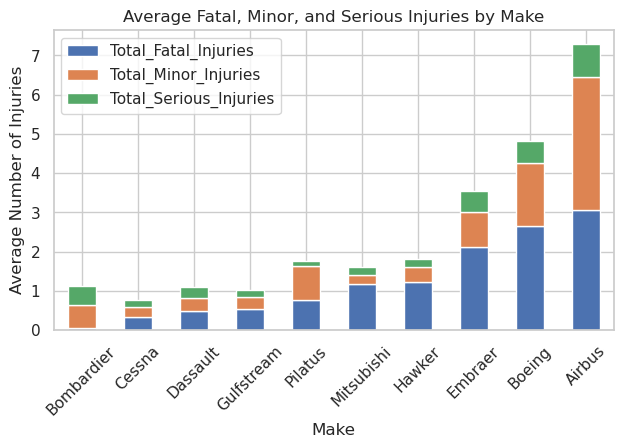

In [27]:
# Plots a bar chart of Aircraft Make by Number of Injuries
sns.set_theme(style='whitegrid', context='notebook')

# Creates stacked bar plot
ax = filtered_df.groupby(['Make'])[['Total_Fatal_Injuries', 'Total_Minor_Injuries', 'Total_Serious_Injuries']]\
    .mean().sort_values(by='Total_Fatal_Injuries', ascending=True).plot(kind='bar', stacked=True)
ax.set_title('Average Fatal, Minor, and Serious Injuries by Make')
ax.set_xlabel('Make')
ax.set_ylabel('Average Number of Injuries');
plt.tight_layout()

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

Next, I analyze the fatality rate by aircraft make. Hawker has the highest fatality rate while Airbus has the lowest.

In [28]:
# Drop all NaNs in new 'injured' columns 
filtered_df = filtered_df.dropna(subset=['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured', 'Fatal_Injury_Proportion', 'Uninjured_Proportion'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Cessna'),
  Text(1, 0, 'Boeing'),
  Text(2, 0, 'Embraer'),
  Text(3, 0, 'Dassault'),
  Text(4, 0, 'Mitsubishi'),
  Text(5, 0, 'Airbus'),
  Text(6, 0, 'Gulfstream'),
  Text(7, 0, 'Pilatus'),
  Text(8, 0, 'Hawker'),
  Text(9, 0, 'Bombardier')])

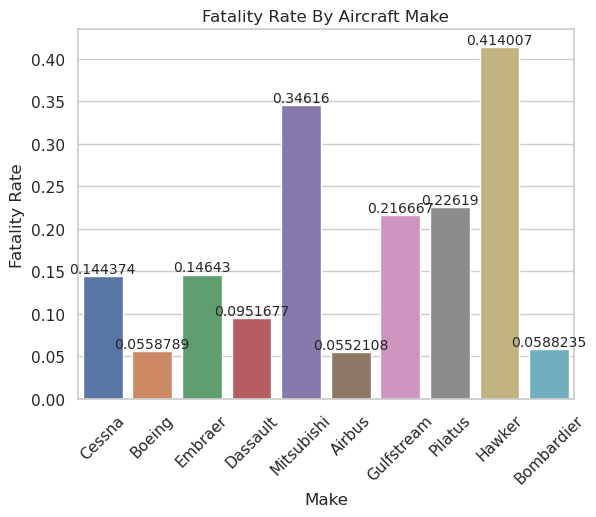

In [29]:
# Create bar chart
ax = sns.barplot(data=filtered_df.sort_values('Fatal_Injury_Proportion'), 
                 x='Make', 
                 y='Fatal_Injury_Proportion',
                 errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);
ax.set(xlabel='Make', ylabel='Fatality Rate', title='Fatality Rate By Aircraft Make');

# Rotate x-axis labels
plt.xticks(rotation=45)

Next, I analyzed the uninjured rate by aircraft make. Airbus has the highest uninjured rate of 89%, followed closely by Bombardier at 86.6% and Boeing at 86.3%.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Cessna'),
  Text(1, 0, 'Boeing'),
  Text(2, 0, 'Embraer'),
  Text(3, 0, 'Dassault'),
  Text(4, 0, 'Mitsubishi'),
  Text(5, 0, 'Gulfstream'),
  Text(6, 0, 'Pilatus'),
  Text(7, 0, 'Hawker'),
  Text(8, 0, 'Airbus'),
  Text(9, 0, 'Bombardier')])

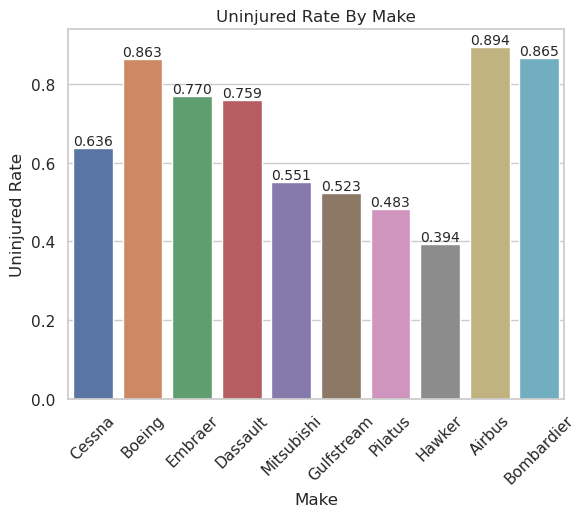

In [36]:
# Creates bar plot
ax = sns.barplot(data=filtered_df, x='Make', y='Uninjured_Proportion', errorbar=None)

# Defines a custom formatter function. This helps to limit the labels on top of the bars to 3 decimal places
def format_func(value, tick_number=None):
    return f'{value:.3f}'

# Uses the custom formatter function in bar_label
ax.bar_label(ax.containers[0], fontsize=10, fmt=format_func)

ax.set(xlabel='Make', ylabel='Uninjured Rate', title='Uninjured Rate By Make')

# Rotate x-axis labels
plt.xticks(rotation=45)

### Analysis by Number of Engines
Aircrafts with 3 engines hold both the highest uninjured rate and the lowest fatality rate, followed by aircrafts with 2 engines, aircrafts with 4 engines, aircafts with 1 engine, and lastly, aircrafts with 0 engines. Aircrafts with 0 engines (gliders) have the lowest uninjured rate but the highest fatality rate.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '4.0'),
  Text(3, 0, '2.0'),
  Text(4, 0, '3.0')])

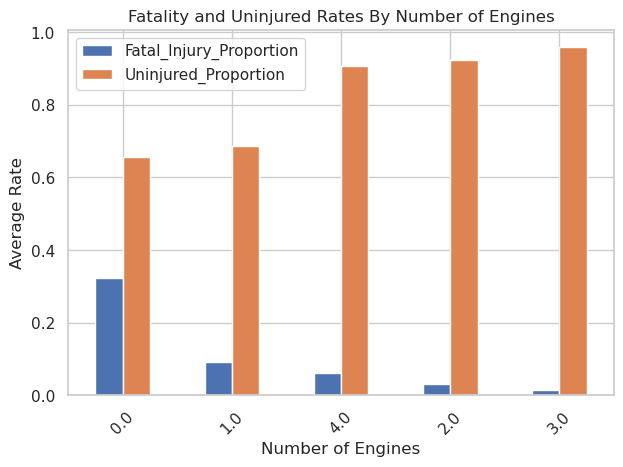

In [ ]:
# Create bar plot
ax = filtered_df.groupby(['Number_Of_Engines'])[['Fatal_Injury_Proportion', 'Uninjured_Proportion']]\
    .mean().sort_values(by='Uninjured_Proportion', ascending=True).plot(kind='bar', stacked=False);
ax.set(xlabel='Number of Engines', ylabel='Average Rate', title='Fatality and Uninjured Rates By Number of Engines');
plt.tight_layout()

# Rotate x-axis labels
plt.xticks(rotation=45)

### Analysis by Aircraft Model
I've decided to recommend the purchase of Airbus 2 engine jets because of their low fatality, high uninjured rate and high model variety (There are 34 models to choose from).

In [ ]:
# According to the data, I'm leaning towards recommending the purchase of Airbus planes because they have the highest
# uninjured rate and the lowest fatality rate
# Airbus doesn't make 3-engine planes,
# Airbus' 4-engine planes, the A340 and A380 have ceased production in favour of 2-engine models
make_options = filtered_df['Model'][(filtered_df['Make']=='Airbus') & (filtered_df['Number_Of_Engines']==2)] 
num_make_options = make_options.nunique()
print(f'There are {num_make_options} double engine Airbus aircraft models to choose from.')

There are 34 double engine Airbus aircraft models to choose from.


In [ ]:
# This shows the number of 2-engine Airbus jets in our dataset. 
filtered_df[(filtered_df['Make']=='Airbus') & (filtered_df['Number_Of_Engines'] == 2)]['Model'].value_counts()

Model
A320              7
A320-211          5
A-320-231         5
A-300B4-605R      4
A319              4
A-300-B4-203      4
A321              4
A-300             4
A-300-600         3
A-300-600R        2
A-320-211         2
A330              2
A319-114          2
A-320-232         2
A-300B4-2C        2
A-300-605R        2
A-310-324         1
A300B4-2C         1
A-310             1
MBB-BK-117-B-2    1
A330-323          1
A300B4-203        1
A300B4-605R       1
A320-232          1
A-310-200         1
A-300-600ER       1
A-320-212         1
A300-B4-203       1
A310              1
AE-340-300        1
A-320             1
A-310-222         1
A-300-B4-103      1
319-131           1
Name: count, dtype: int64

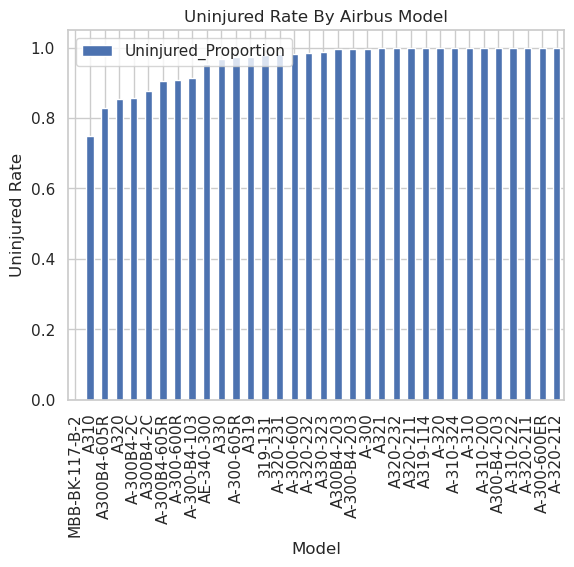

In [ ]:
# Plot bar graph of Uninjured Rates by Airbus Model
ax = filtered_df[(filtered_df['Make']=='Airbus') & (filtered_df['Number_Of_Engines'] == 2)].groupby(['Model'])\
    [['Uninjured_Proportion']].mean().sort_values(by='Uninjured_Proportion', ascending=True).plot(kind='bar', stacked=True)
ax.set(xlabel='Model', ylabel='Uninjured Rate', title='Uninjured Rate By Airbus Model');

Next, I'll count the number of Airbus models with a 100% uninjured rate. I've found out that there are 21 models. That's plenty to choose from.

In [ ]:
# Filter DF for rows where 'Uninjured_Proportion' is 1.0
uninjured_df = filtered_df[(filtered_df['Make']=='Airbus') & (filtered_df['Number_Of_Engines'] == 2) & (filtered_df['Uninjured_Proportion'] == 1.0)]

# Count unique 'Model' values
num_models = uninjured_df['Model'].nunique()

print(f"Number of Airbus models with a 100% uninjured rate: {num_models}")

Number of Airbus models with a 100% uninjured rate: 21


Now, I plot the number of occurences of the safest Airbus models. This will provide insights into the following: 
1. **Frequency of use/Popularity** - this gives us an idea about how frequently each model is used. Models with higher occurences are likely to be more common.
2. **Highlight safety record**

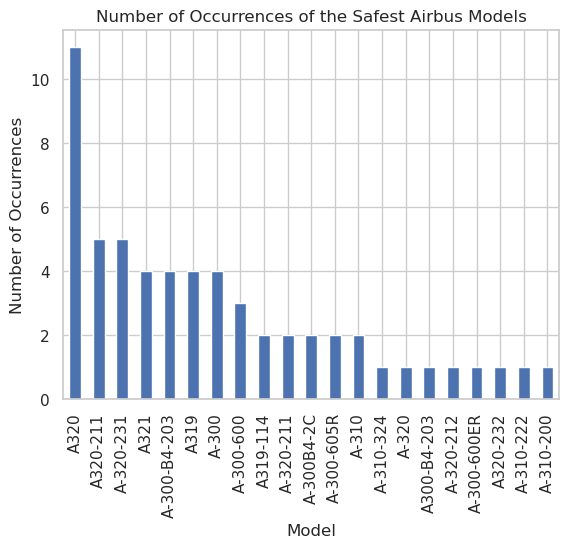

In [ ]:
# Gets the 21 safest Airbus models
safest_airbus_models = uninjured_df['Model'].unique()

# Filter the DataFrame for rows where 'Model' is in safest_airbus_models
safest_airbus_models_count = filtered_df[filtered_df['Model'].isin(safest_airbus_models)]

# Plots the number of occurrences of each of the safest Airbus models
ax = safest_airbus_models_count['Model'].value_counts().plot(kind='bar')
ax.set(xlabel='Model', ylabel='Number of Occurrences', title='Number of Occurrences of the Safest Airbus Models');

### **Limitations**
1. **Missing Values** - Significant portions of the data are missing in many columns. Missing data can lead to biased or incomplete analysis. For instance, missing information about the location or aircraft category might not reveal important patterns related to accident frequency or severity.
2. **Incomplete Data on Injuries** - Columns `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, and `Total.Uninjured` have many missing values. Without complete injury data, it's challenging to accurately assess the safety of different aircraft models. The risk assessment might be skewed if severe accidents are underreported or missing.
3. **Lack of Contextual Information** - The dataset doesn't include detailed information on operational factors such as maintenance records, pilot experience, or specific environmental conditions at the time of the accident. These factors are crucial in understanding the full context of accidents and making informed recommendations. Without this data, this analysis may have overlooked critical contributors to aviation safety.
4. **Historical Nature of Data** - The dataset spans from 1962 to 2023. Aviation technology, regulations, and practices have evolved significantly over this long period. Old data might not be as relevant to current aircraft models and technologies. Trends observed in old data might not accurately reflect current safety standards.
5. **Geographical Bias** - The data primarily covers accidents in the US and international waters. This geographical focus might not represent global aviation safety trends, limiting the applicability of the findings to international operations and thereby potentially affecting the recommendations I've made.

### **Recommendation** 
#### **Introduction**

As our company diversifies into the aviation sector, it is crucial to select aircraft that prioritize safety, reliability, and operational efficiency. After analyzing the National Transportation Safety Board (NTSB) data on aviation accidents from 1962 to 2023, I am recommending the purchase of Airbus aircraft. This recommendation is based on their impressive safety record, including the highest uninjured rate and the lowest fatality rate among the aircraft manufacturers analyzed.

#### **Key Findings**

1. Highest Uninjured Rate - Airbus aircraft have demonstrated a superior safety performance, with the highest proportion of passengers and crew remaining uninjured in the event of an accident. This statistic is a strong indicator of the robust safety features and engineering excellence inherent in Airbus designs.

2. Lowest Fatality Rate - The data reveals that Airbus planes have the lowest fatality rate among major aircraft manufacturers. This is a critical factor for ensuring passenger safety and mitigating risks associated with aviation operations.

3. Variety of Models: Airbus offers a diverse range of at least 21 models, catering to various market needs including commercial, cargo, and private aviation. This variety allows us to select models that best fit our specific operational requirements and business goals.

#### **Advantages of Airbus Aircraft**

1. Advanced Safety Features - Airbus is known for incorporating cutting-edge safety technologies and continuous improvements.
2. Fuel Efficiency - Many Airbus models are designed with fuel efficiency in mind, contributing to lower operational costs and reduced environmental impact.
3. Operational Flexibility - The wide range of Airbus models provides flexibility in fleet management, allowing us to optimize aircraft utilization based on route demand and passenger capacity.
4. Strong Market Reputation - Airbus’ reputation for reliability and safety in the aviation industry will enhance our brand’s credibility and attracts more customers. Boeing’s recent missteps have only highlighted this.

#### **Recommendation**

Based on the comprehensive analysis of the NTSB data and the superior safety performance of Airbus aircraft, I strongly recommend that our aviation division consider the following actions:

1. Initiate Purchase Discussions with Airbus - Engage in detailed discussions with Airbus to explore purchasing options, including potential bulk purchase discounts and customized configurations.

2. Evaluate Specific Models: Conduct a thorough evaluation of the available Airbus models to identify those that best align with our operational requirements. Focus on models that have demonstrated exceptional safety records and operational efficiency.

3. Plan for Pilot and Crew Training: Ensure that our pilots and crew receive specialized training for the selected Airbus models. This will enhance operational safety and efficiency, contributing to a smooth transition into our new aviation operations.

4. Monitor and Review: Establish a monitoring system to continually assess the performance and safety of our Airbus fleet. Regularly review incident reports and maintenance records to ensure ongoing compliance with safety standards.

### **Conclusion**

Investing in Airbus aircraft aligns with our commitment to safety, operational excellence, and customer satisfaction. The strong safety record and diverse model range of Airbus provide a solid foundation for launching our new aviation division successfully. I am confident that this strategic decision will position us for long-term success in the aviation market.